In [ ]:
import pandas as pd; pd.set_option('display.max_columns', 50)
import numpy as np
import matplotlib.pyplot as plt

## Reading the data file
credit_card = pd.read_excel('default of credit card clients.xls', skiprows = 1)
credit_card.head()

In [ ]:
## Splitting the data into train and test
train = credit_card.groupby('default payment next month', group_keys = False).apply(lambda x: x.sample(frac = 0.8))
test = credit_card[~np.isin(credit_card['ID'], train['ID'])]

## Dropping ID 
train = train.drop(columns = 'ID', axis = 1)
test = test.drop(columns = 'ID', axis = 1)

test_target = test['default payment next month']
test = test.drop(columns = 'default payment next month', axis = 1)

## Writing the data to csv 
train.to_csv('train.csv', index = False)
test.to_csv('test.csv', index = False)
test_target.to_csv('test_target.csv', index = False)

## Answering Questions

[Text(697.5, 713.475, 'PAY_0 <= 1.5\ngini = 0.345\nsamples = 19200\nvalue = [14953, 4247]'),
 Text(348.75, 509.625, 'PAY_2 <= 1.5\ngini = 0.278\nsamples = 17236\nvalue = [14365, 2871]'),
 Text(174.375, 305.775, 'BILL_AMT1 <= 529.0\ngini = 0.248\nsamples = 15803\nvalue = [13506, 2297]'),
 Text(87.1875, 101.92499999999995, 'gini = 0.372\nsamples = 2462\nvalue = [1854, 608]'),
 Text(261.5625, 101.92499999999995, 'gini = 0.221\nsamples = 13341\nvalue = [11652, 1689]'),
 Text(523.125, 305.775, 'PAY_5 <= 1.0\ngini = 0.48\nsamples = 1433\nvalue = [859, 574]'),
 Text(435.9375, 101.92499999999995, 'gini = 0.458\nsamples = 1019\nvalue = [658, 361]'),
 Text(610.3125, 101.92499999999995, 'gini = 0.5\nsamples = 414\nvalue = [201, 213]'),
 Text(1046.25, 509.625, 'PAY_3 <= -0.5\ngini = 0.42\nsamples = 1964\nvalue = [588, 1376]'),
 Text(871.875, 305.775, 'PAY_AMT4 <= 412.5\ngini = 0.499\nsamples = 126\nvalue = [66, 60]'),
 Text(784.6875, 101.92499999999995, 'gini = 0.451\nsamples = 64\nvalue = [22, 42

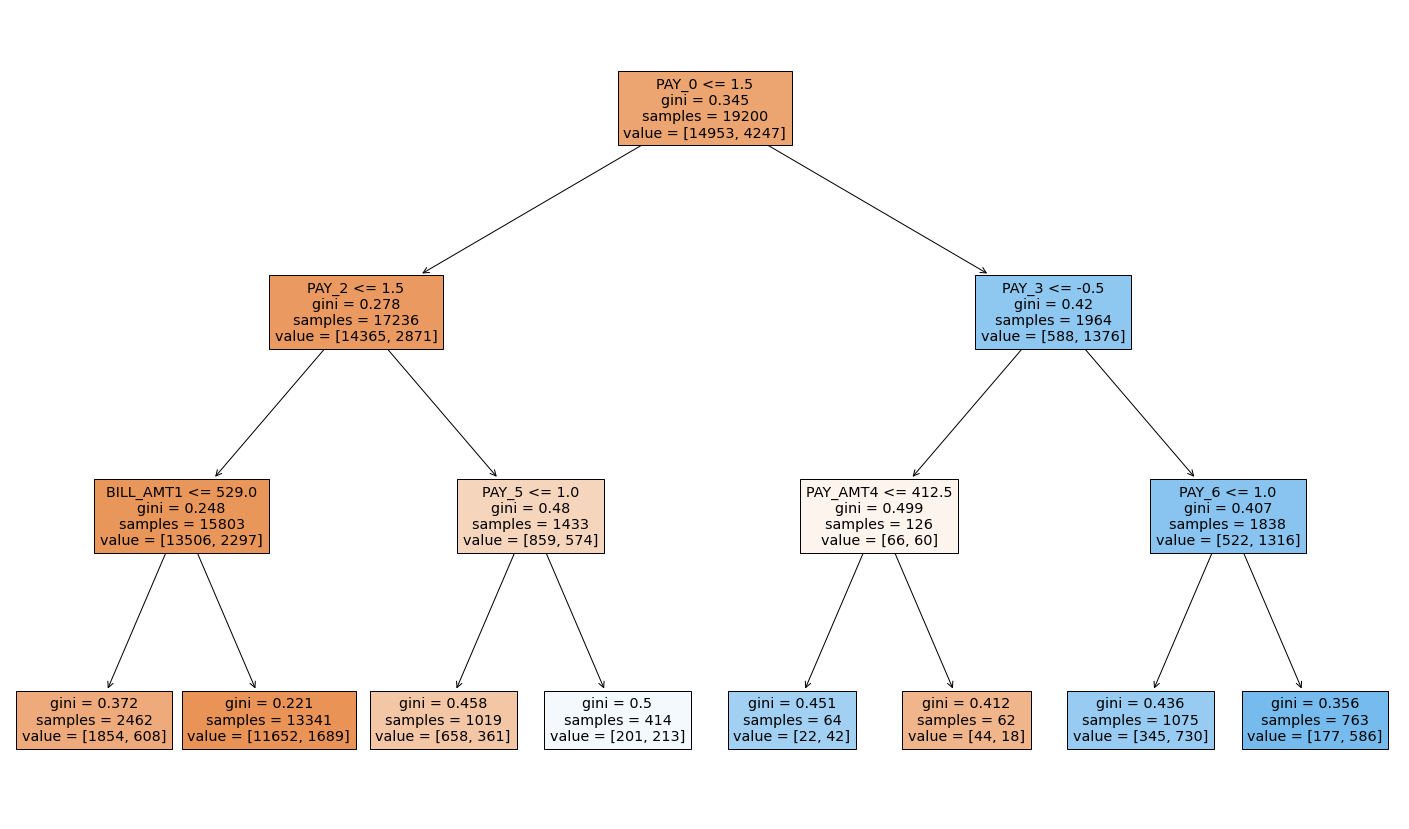

In [1]:
import pandas as pd; pd.set_option('display.max_columns', 50)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from precision_recall_cutoff import precision_recall_cutoff

## Reading data files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# ## Chaning labels
train['SEX'] = np.where(train['SEX'] == 1, 'male', 'female')
train['EDUCATION'] = np.where(train['EDUCATION'] == 1, 'graduate_school', 
                              np.where(train['EDUCATION'] == 2, 'university',
                                       np.where(train['EDUCATION'] == 3, 'high_school', 'other_unknown')))
train['MARRIAGE'] = np.where(train['MARRIAGE'] == 1, 'married', 
                             np.where(train['MARRIAGE'] == 2, 'single', 'other'))


test['SEX'] = np.where(test['SEX'] == 1, 'male', 'female')
test['EDUCATION'] = np.where(test['EDUCATION'] == 1, 'graduate_school', 
                              np.where(test['EDUCATION'] == 2, 'university',
                                       np.where(test['EDUCATION'] == 3, 'high_school', 'other_unknown')))
test['MARRIAGE'] = np.where(test['MARRIAGE'] == 1, 'married', 
                             np.where(test['MARRIAGE'] == 2, 'single', 'other'))

## Creating ID columns
train['ID'] = list(range(1, train.shape[0] + 1))

## Splitting the data into train and test
training = train.groupby('default payment next month', group_keys = False).apply(lambda x: x.sample(frac = 0.8))
testing = train[~np.isin(train['ID'], training['ID'])]

## Dropping ID
training = training.drop(columns = 'ID', axis = 1)
testing = testing.drop(columns = 'ID', axis = 1)

## Defining inputs and target variables
X_train = training.drop(columns = 'default payment next month', axis = 1).reset_index(drop = True)
Y_train = training['default payment next month'].reset_index(drop = True)

X_test = testing.drop(columns = 'default payment next month', axis = 1).reset_index(drop = True)
Y_test = testing['default payment next month'].reset_index(drop = True)

## Changing labels to dummies 
X_train = pd.concat([X_train.drop(columns = 'SEX', axis = 1), pd.get_dummies(X_train['SEX'])], axis = 1)
X_train = pd.concat([X_train.drop(columns = 'EDUCATION', axis = 1), pd.get_dummies(X_train['EDUCATION'])], axis = 1)
X_train = pd.concat([X_train.drop(columns = 'MARRIAGE', axis = 1), pd.get_dummies(X_train['MARRIAGE'])], axis = 1)

X_test = pd.concat([X_test.drop(columns = 'SEX', axis = 1), pd.get_dummies(X_test['SEX'])], axis = 1)
X_test = pd.concat([X_test.drop(columns = 'EDUCATION', axis = 1), pd.get_dummies(X_test['EDUCATION'])], axis = 1)
X_test = pd.concat([X_test.drop(columns = 'MARRIAGE', axis = 1), pd.get_dummies(X_test['MARRIAGE'])], axis = 1)

test = pd.concat([test.drop(columns = 'SEX', axis = 1), pd.get_dummies(test['SEX'])], axis = 1)
test = pd.concat([test.drop(columns = 'EDUCATION', axis = 1), pd.get_dummies(test['EDUCATION'])], axis = 1)
test = pd.concat([test.drop(columns = 'MARRIAGE', axis = 1), pd.get_dummies(test['MARRIAGE'])], axis = 1)

## Engineering features via decision tree
tree_md = DecisionTreeClassifier(max_depth = 3).fit(X_train, Y_train)

## Visualizing the decision-tree model 
fig = plt.figure(figsize = (25, 15))
plot_tree(tree_md, feature_names = X_train.columns, filled = True)

In [2]:
## Engineering features from decision tree
X_train['interaction_1'] = np.where((X_train['PAY_0'] <= 1.5) & (X_train['PAY_2'] <= 1.5) & (X_train['PAY_AMT3'] > 395), 1, 0)
X_train['interaction_2'] = np.where((X_train['PAY_0'] <= 1.5) & (X_train['PAY_2'] <= 1.5) & (X_train['PAY_AMT3'] < 395), 1, 0)

X_test['interaction_1'] = np.where((X_test['PAY_0'] <= 1.5) & (X_test['PAY_2'] <= 1.5) & (X_test['PAY_AMT3'] > 395), 1, 0)
X_test['interaction_2'] = np.where((X_test['PAY_0'] <= 1.5) & (X_test['PAY_2'] <= 1.5) & (X_test['PAY_AMT3'] < 395), 1, 0)

test['interaction_1'] = np.where((test['PAY_0'] <= 1.5) & (test['PAY_2'] <= 1.5) & (test['PAY_AMT3'] > 395), 1, 0)
test['interaction_2'] = np.where((test['PAY_0'] <= 1.5) & (test['PAY_2'] <= 1.5) & (test['PAY_AMT3'] < 395), 1, 0)

In [ ]:
## Strong heredity
importance_results = list()

for i in range(0, 20):
    print(i)
    ## Building RF model
    RF = RandomForestClassifier(n_estimators = 500, max_depth = 3).fit(X_train.drop(columns = ['interaction_1', 'interaction_2'], axis = 1), Y_train)
    
    ## Extracting and storting importance
    importance_results.append(RF.feature_importances_)
    
## Converting list to data-frame
importance_results = pd.DataFrame(importance_results)
importance_results.columns = X_train.drop(columns = ['interaction_1', 'interaction_2'], axis = 1).columns

## Sorting based on average importance
importance_results = importance_results.apply(np.mean, axis = 0).sort_values(ascending = False)
importance_results

In [3]:
## Computing strong heredeity interactions
X_train['interaction_3'] = X_train['PAY_0'] * X_train['PAY_2'] 
X_train['interaction_4'] = X_train['PAY_0'] * X_train['PAY_3']
X_train['interaction_5'] = X_train['PAY_2'] * X_train['PAY_3']

X_test['interaction_3'] = X_test['PAY_0'] * X_test['PAY_2'] 
X_test['interaction_4'] = X_test['PAY_0'] * X_test['PAY_3']
X_test['interaction_5'] = X_test['PAY_2'] * X_test['PAY_3']

test['interaction_3'] = test['PAY_0'] * test['PAY_2'] 
test['interaction_4'] = test['PAY_0'] * test['PAY_3']
test['interaction_5'] = test['PAY_2'] * test['PAY_3']

## RFE

In [ ]:
## Defining list to store results
feature_selection = list()

for i in range(0, 100):
    print(i)
    ## Running RFE
    RF_auto_features = RFECV(estimator = RandomForestClassifier(n_estimators = 500, max_depth = 3), step = 1, min_features_to_select = 2, cv = 3).fit(X_train, Y_train)

    ## Storing support
    feature_selection.append(RF_auto_features.support_)
    
## Changing to data-frame
feature_selection = pd.DataFame(feature_selection)
feature_selection.columns = X_train.columns

## Sorting based on average importance
feature_selection = feature_selection.apply(np.mean, axis = 0).sort_values(ascending = False)
feature_selection

## Modeling

In [5]:
## Defining inputs
X_train_1 = X_train[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_5', 'interaction_1']]
X_test_1 = X_test[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_5', 'interaction_1']]

## Building the model
RF_md_1 = RandomForestClassifier(n_estimators = 500, max_depth = 3).fit(X_train_1, Y_train)

## Predicting on the test
RF_pred_1 = RF_md_1.predict_proba(X_test_1)[:, 1]

## Changing likelihoods to labels
cutoff_1, RF_pred_lab_1 = precision_recall_cutoff(Y_test, RF_pred_1)
print('The optimal cutoff is', cutoff_1)

## Computing classification report
print(classification_report(Y_test, RF_pred_lab_1))

The optimal cutoff is 0.23482478782387237
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      3738
           1       0.53      0.59      0.56      1062

    accuracy                           0.79      4800
   macro avg       0.70      0.72      0.71      4800
weighted avg       0.80      0.79      0.80      4800



In [6]:
## Defining inputs
X_train_2 = X_train[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_5', 'interaction_1', 'PAY_4']]
X_test_2 = X_test[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_5', 'interaction_1', 'PAY_4']]

## Building the model
RF_md_2 = RandomForestClassifier(n_estimators = 500, max_depth = 3).fit(X_train_2, Y_train)

## Predicting on the test
RF_pred_2 = RF_md_2.predict_proba(X_test_2)[:, 1]

## Changing likelihoods to labels
cutoff_2, RF_pred_lab_2 = precision_recall_cutoff(Y_test, RF_pred_2)
print('The optimal cutoff is', cutoff_2)

## Computing classification report
print(classification_report(Y_test, RF_pred_lab_2))

The optimal cutoff is 0.22290294360009974
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      3738
           1       0.50      0.63      0.56      1062

    accuracy                           0.78      4800
   macro avg       0.69      0.72      0.70      4800
weighted avg       0.80      0.78      0.79      4800



## Predicting on test